In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv("df_train_final_not_normalized.csv")

In [17]:
data_200 = data.iloc[200:, :]
data_200['Mag_shifted'] = data_200['Magnitude Mw']
data_200['Mag_shifted'].iloc[1:] = data_200['Magnitude Mw'].iloc[0:-1]
data_200 = data_200.iloc[1:-1, : ]
data_200 = data_200.drop(["Unnamed: 0"], axis = 1)
date = data_200['Date']
data_200 = data_200.drop(["Date"], axis = 1)
min_max_scaler = sklearn.preprocessing.MinMaxScaler()

df_final = data_200.copy()
df_final = pd.DataFrame(min_max_scaler.fit_transform(df_final))
df_final.columns = data_200.columns

C:\Users\maroohi\AppData\Local\Temp\ipykernel_14060\3369629723.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_200['Mag_shifted'] = data_200['Magnitude Mw']
C:\Users\maroohi\AppData\Local\Temp\ipykernel_14060\3369629723.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_200['Mag_shifted'].iloc[1:] = data_200['Magnitude Mw'].iloc[0:-1]


In [72]:
def load_data(df, seq_len, test_set_size_percentage = 0, valid_set_size_percentage = 20):
    data_raw = df.to_numpy()
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len): 
        data.append(data_raw[index: index + seq_len])
    
    data = np.array(data);
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));  
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,-1]
    
    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1,-1]
    
    x_test = data[train_set_size+valid_set_size:,:-1,:]
    y_test = data[train_set_size+valid_set_size:,-1,-1]
    
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]

In [73]:
seq_len = 200 # choose sequence length
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_final, seq_len)

In [74]:
x_train.shape, x_valid.shape

((215433, 199, 20), (53858, 199, 20))

In [75]:
y_train.shape

(215433,)

In [79]:
x_train.shape[1]

199

In [81]:
x_train.shape

(215433, 199, 20)

In [82]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],20)))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "linear"))

model.compile(loss='mse', optimizer='adam')

print ('model compiled')

model.summary()

model compiled
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 199, 50)           14200     
                                                                 
 dropout_14 (Dropout)        (None, 199, 50)           0         
                                                                 
 lstm_28 (LSTM)              (None, 100)               60400     
                                                                 
 dropout_15 (Dropout)        (None, 100)               0         
                                                                 
 dense_17 (Dense)            (None, 1)                 101       
                                                                 
Total params: 74,701
Trainable params: 74,701
Non-trainable params: 0
_________________________________________________________________


In [83]:
cp1 = ModelCheckpoint('model/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [84]:
model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=10, callbacks=[cp1])

Epoch 1/10
6733/6733 [==============================] - ETA: 0s - loss: 0.0015

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


6733/6733 [==============================] - 959s 142ms/step - loss: 0.0015 - val_loss: 3.0357e-05
Epoch 2/10
6733/6733 [==============================] - ETA: 0s - loss: 1.2185e-04

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


6733/6733 [==============================] - 965s 143ms/step - loss: 1.2185e-04 - val_loss: 2.1374e-05
Epoch 3/10
6733/6733 [==============================] - ETA: 0s - loss: 8.5060e-05

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


6733/6733 [==============================] - 1020s 151ms/step - loss: 8.5060e-05 - val_loss: 3.7128e-06
Epoch 4/10
6733/6733 [==============================] - 1051s 156ms/step - loss: 8.0382e-05 - val_loss: 4.3674e-06
Epoch 5/10
6733/6733 [==============================] - 1017s 151ms/step - loss: 7.7829e-05 - val_loss: 2.0145e-05
Epoch 6/10
6733/6733 [==============================] - 1019s 151ms/step - loss: 7.5782e-05 - val_loss: 5.6184e-06
Epoch 7/10
6733/6733 [==============================] - 1024s 152ms/step - loss: 7.4879e-05 - val_loss: 2.5582e-05
Epoch 8/10
6733/6733 [==============================] - 1032s 153ms/step - loss: 7.3799e-05 - val_loss: 1.2340e-05
Epoch 9/10
6733/6733 [==============================] - 1049s 156ms/step - loss: 7.2478e-05 - val_loss: 6.0210e-06
Epoch 10/10
6733/6733 [==============================] - 1050s 156ms/step - loss: 7.2022e-05 - val_loss: 8.5686e-06


In [37]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [85]:
train_predictions = model.predict(x_train).flatten()


6733/6733 [==============================] - 248s 37ms/step


In [87]:
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

,Train Predictions,Actuals
0,0.329437,0.330739
1,0.478684,0.480545
2,0.424740,0.428016
3,0.314409,0.315175
4,0.280205,0.278210
...,...,...
215428,0.304500,0.307393
215429,0.293226,0.293774
215430,0.394951,0.394942
215431,0.334941,0.336576


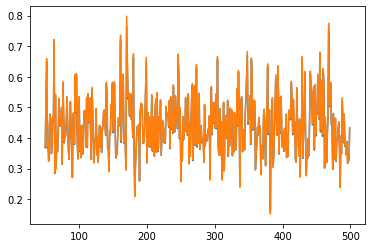

In [91]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:500])
plt.plot(train_results['Actuals'][50:500])

In [93]:
test_predictions = model.predict(x_valid).flatten()

1684/1684 [==============================] - 62s 37ms/step


In [94]:
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_valid})
test_results

,Test Predictions,Actuals
0,0.279015,0.280156
1,0.240389,0.239300
2,0.249104,0.247082
3,0.313406,0.313230
4,0.460726,0.461089
...,...,...
53853,0.403547,0.404669
53854,0.244575,0.245136
53855,0.256395,0.254864
53856,0.335502,0.334630


Text(0, 0.5, 'Scaled Magnitude')

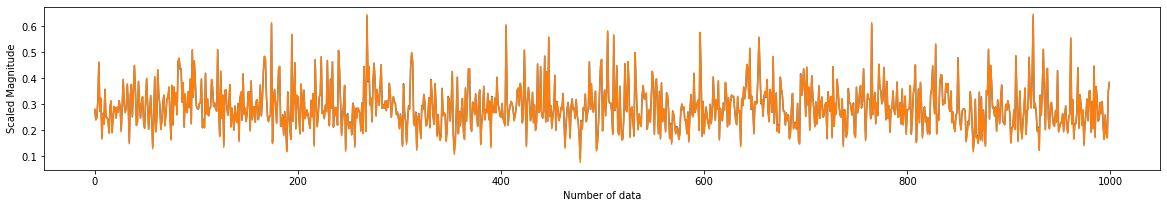

In [116]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(test_results['Test Predictions'][0:1000])
plt.plot(test_results['Actuals'][0:1000])
plt.xlabel('Number of data')
plt.ylabel('Scaled Magnitude')

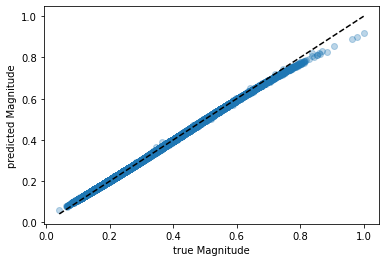

In [99]:
plt.scatter(y_train, train_predictions, alpha=0.3)
grid = np.linspace(y_train.min(), y_train.max(), 1000)
plt.plot(grid, grid, '--k');
plt.xlabel("true Magnitude");
plt.ylabel("predicted Magnitude");

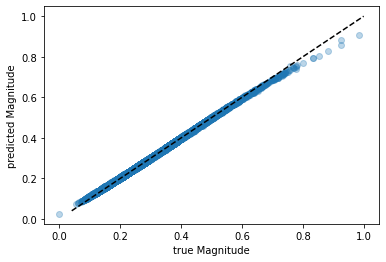

In [101]:
plt.scatter(y_valid, test_predictions, alpha=0.3)
grid = np.linspace(y_train.min(), y_train.max(), 1000)
plt.plot(grid, grid, '--k');
plt.xlabel("true Magnitude");
plt.ylabel("predicted Magnitude");